## Observations and Insights 

1. High R-squared value; 0.92. 92% of the dependent variable variation (tumor Volume) is explained by the linear model. 
2. Capomulin has the lowest mean & SEM (standard error of mean). Therefore, indicating Capomulin's sample mean is the most accurate estimate of the population mean.
3. There is a positive correlation between mouse size and tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as stat
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata,study_results,how="outer", on="Mouse ID")
# Display the data table for preview
combined.head(21)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Counting the Number of Mice per Mice ID to determine if there are any duplicates
mice_count = combined["Mouse ID"].value_counts().head()
# Sort highest to lowest 
sorted_mice_count = mice_count.sort_values(ascending=False)
sorted_mice_count

g989    13
u364    10
a401    10
b742    10
i901    10
Name: Mouse ID, dtype: int64

In [3]:
# Count the number of Unique Mouse ID
len(combined['Mouse ID'].unique())

249

In [4]:
# Drop all rows assicated with g989
combined.drop(combined.loc[combined['Mouse ID']=="g989"].index, inplace=True)
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Count the number of Unique Mouse ID
len(combined['Mouse ID'].unique())

248

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = pd.DataFrame(combined)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of rows in the clean DataFrame.
combined["Mouse ID"].value_counts().sum()

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group Data by Drug Regimen
tumor_group = combined.groupby("Drug Regimen")

# Calculate Mean
mean = tumor_group["Tumor Volume (mm3)"].mean()

# Calculate Median
median = tumor_group["Tumor Volume (mm3)"].median()

# Calculate Variance
variance = tumor_group["Tumor Volume (mm3)"].var()

# Calculate Standard Deviation
standard_deviation = tumor_group["Tumor Volume (mm3)"].std()

# Caluclate SEM
SEM = tumor_group["Tumor Volume (mm3)"].sem()

# Create Data frame with calcuated mean, median, variance, standard deviation, and SEM
summary_stats = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": standard_deviation, "SEM": SEM}).round(3)
summary_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group mean, median, variance, standard deviation, and SEM
grouped = cleaned_df.groupby(["Drug Regimen"]).agg(\
    mean = ("Tumor Volume (mm3)",np.mean),\
    median = ("Tumor Volume (mm3)",np.median), \
    variance = ("Tumor Volume (mm3)", np.var),\
    standard_deviation = ("Tumor Volume (mm3)", np.std),\
    SEM = ("Tumor Volume (mm3)",st.sem)).round(3)

# Display Data
grouped.head()

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

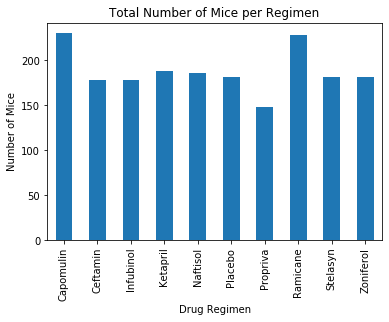

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Group Data by Drug Regimen and Mouse Count
total_mice_per_regimen = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Plot Bar Graph
total_mice_per_regimen.plot(kind="bar")

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Total Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

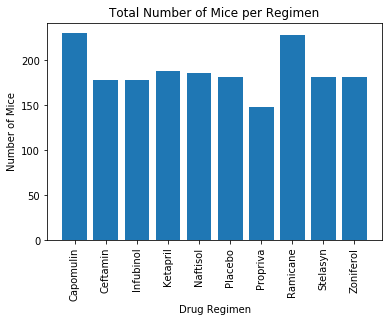

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Group Data by Drug Regimen and Mouse Count
total_mice_per_regimen = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Define X-Axis as Mice Regimens
x_axis = np.arange(len(total_mice_per_regimen))

# Plot Bar Graph
plt.bar(x_axis,total_mice_per_regimen)

# Replace index with Drug Regimens
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Total Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0.5, 1.0, 'Mouse Gender')

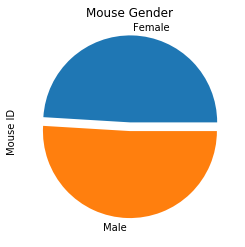

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group Data by Sex and Mouse Count
mice_per_gender = cleaned_df.groupby(["Sex"]).count()["Mouse ID"]

# Define Explode
explode = (0.1, 0)

# Plot Pie Graph
mice_per_gender.plot.pie(explode = explode)

# Add Title
plt.title("Mouse Gender")

Text(0.5, 1.0, 'Mouse Gender')

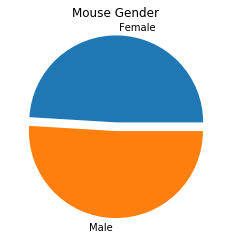

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group Data by Sex and Mouse Count
total_mice_per_sex = cleaned_df.groupby(["Sex"]).count()["Mouse ID"]

# Define Explode
explode = (0.1, 0)

# Define labels
gender = ["Female","Male"]

# Plot Pie Graph
plt.pie(total_mice_per_sex,explode = explode, labels=gender)
plt.title("Mouse Gender")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Delete duplicate Drug Regimen except Last Row
last_row = cleaned_df.drop_duplicates(subset=["Mouse ID"],keep="last")

# Select Select Columns Drug Regimen, Mouse ID, Timepoint, Tumor Volume
data = last_row[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472
...,...,...,...,...
1859,Stelasyn,z314,5,45.934712
1862,Propriva,z435,10,48.710661
1872,Infubinol,z581,45,62.754451
1882,Naftisol,z795,45,65.741070


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Sorry, not sure how to do this
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'list' object has no attribute 'quantile'

Text(0, 0.5, 'Tumor Volume')

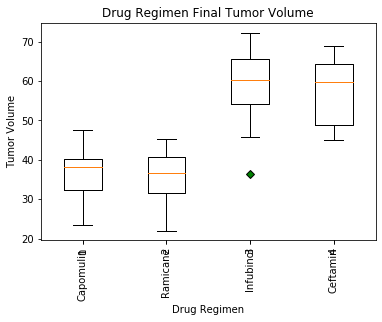

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Make a list of treatements reguire for box plot
treatments= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Define Green Diamond marker for outliers
green_diamond = dict(markerfacecolor='g', marker='D')

# Create a list to store Tumor Volume
tumor_volume = []

# Group data by drug Regimen and apply list to tumor volume
tumor_lists = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Create a Data Frame for tumor_list
tumor_lists_df = pd.DataFrame(tumor_lists)

# Select required drug regimen for box plot
required_drugs = tumor_lists_df.loc[treatments]
required_drugs

# Loop through required drugs for tumor volume
tumor_volume = [vol for vol in required_drugs['Tumor Volume (mm3)']]
tumor_volume_df = pd.DataFrame(tumor_volume)
tumor_volume_df

# Replace Numbers for Drug Reqimen
plt.xticks([1,2,3,4], (treatments), rotation='vertical')

# Plot Box Plot with Green Diamond for outliers
plt.boxplot(tumor_volume_df,flierprops=green_diamond)

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Drug Regimen Final Tumor Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Size')

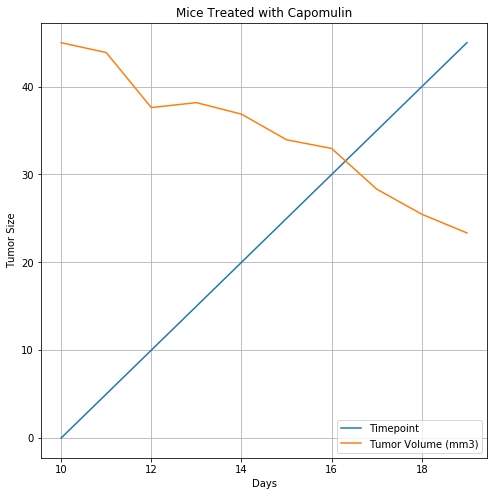

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Select Mouse "s185" with Mouse Id Column 
mouse_volume = combined.loc[combined["Mouse ID"]=="s185"]

# Select Columns Mouse ID, Timepoint, Tumor Volume
cleaned_mouse_volume = mouse_volume[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Plot Mice Treated with Capomulin Liner graph
cleaned_mouse_volume.plot.line(grid = True, figsize= (8,8))

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Mice Treated with Capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Size")

Text(0, 0.5, 'Tumor Size')

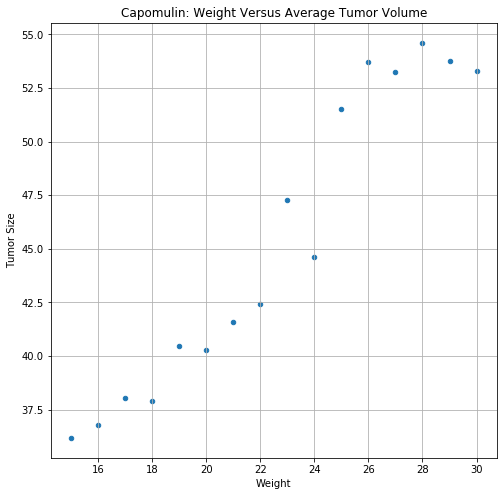

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group data by weight and average tumor volume
mouse_weight = combined.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create Mouse weight dataframe and add index
mouse_weight_df = pd.DataFrame(mouse_weight).reset_index()

# Plot Capomulin: Weight Versus Average Tumor Volume Scatter Plot
mouse_weight_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Capomulin: Weight Versus Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Tumor Size")

## Correlation and Regression

The r-squared is: 0.9260375144695904


Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

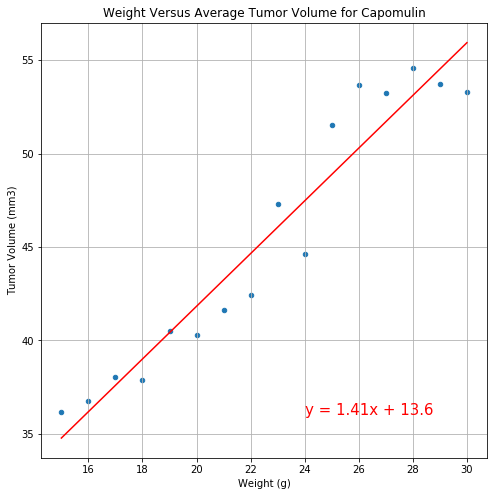

In [43]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

# Define x-value as mouse weight
x_values = mouse_weight_df['Weight (g)']

# Define y-value as tumor_size
y_values = mouse_weight_df['Tumor Volume (mm3)']

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Scatter Plot
mouse_weight_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(24,36),fontsize=15,color="red")

# Plot Title
plt.title("Weight Versus Average Tumor Volume for Capomulin")